<a href="https://colab.research.google.com/github/JahnaviGunti/Remote-Repo/blob/main/Project_1_using_Linear_regresstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [110]:
import pandas as pd
import numpy as np

In [111]:
medical_info=pd.read_csv("/content/insurance.csv")
medical_info

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [112]:

medical_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [113]:
#Here are some statistics for the numerical columns
medical_info.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Exploratory Analysis and Visualization**
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [114]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
medical_info.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [116]:
fig = px.histogram(medical_info,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

**Body Mass Index**
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [117]:
fig = px.histogram(medical_info,
                   x = 'bmi',
                   marginal='box',
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

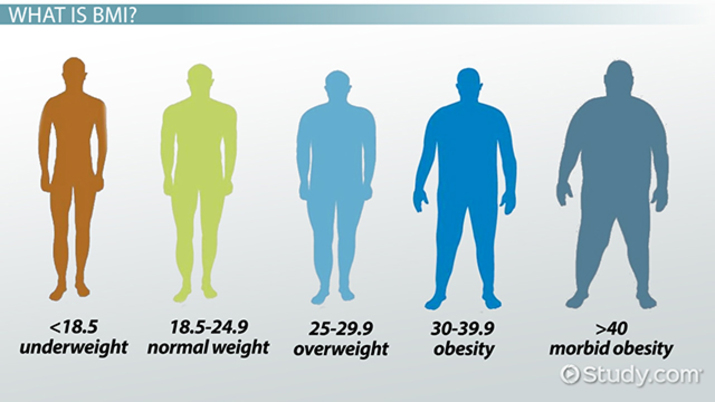

**Charges**
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

<Axes: xlabel='charges', ylabel='Count'>

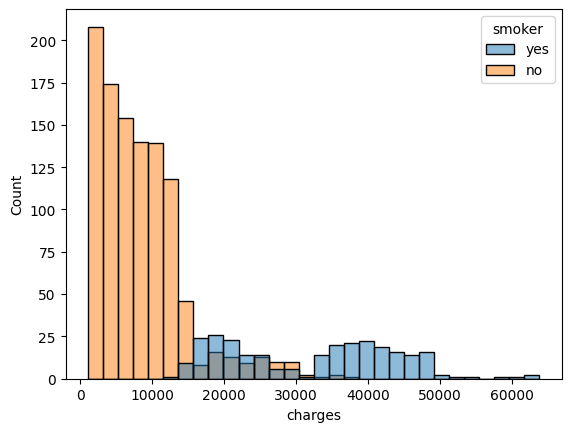

In [118]:
sns.histplot(medical_info, x='charges',hue='smoker')

In [119]:
fig = px.histogram(medical_info,
             x='charges',

             title = 'Annual charges',
             color='smoker')
fig.update_layout(bargap=0.05)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.

# **Smoker**
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [120]:
px.histogram(medical_info, x='smoker',color='sex')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

**Age and Charges**
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [121]:
px.scatter(medical_info,
           x ='age',
           y = 'charges',
           color='smoker',
           title = 'Age VS charges')

**BMI and Charges**
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [122]:
px.scatter(medical_info,
           x = 'bmi',
           y ='charges',
           color = 'smoker',
           title = 'BMI VS charges')


It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

**Correlation**
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series

In [123]:
medical_info.charges.corr(medical_info.age)

np.float64(0.2990081933306476)

In [124]:
medical_info.charges.corr(medical_info.bmi)

np.float64(0.19834096883362895)

In [125]:
medical_info.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


o compute the correlation for categorical columns, they must first be converted into numeric columns.



In [126]:
smoker_val = {'no':0,'yes':1}
smoker_num = medical_info.smoker.map(smoker_val)
medical_info.charges.corr(smoker_num)

np.float64(0.787251430498478)

Here's how correlation coefficients can be interpreted (source):

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually (source):


Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

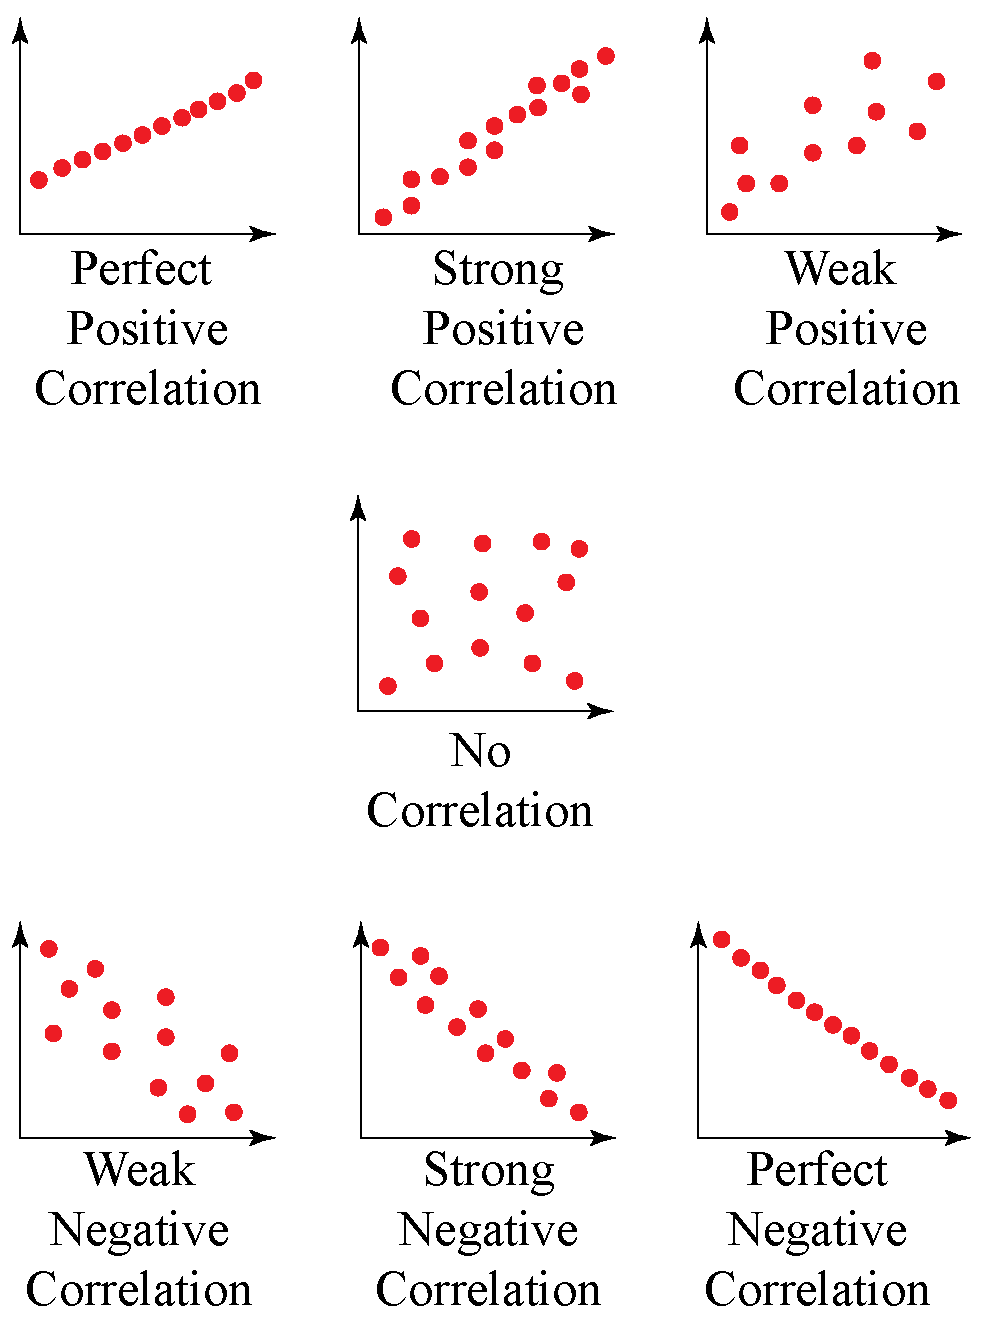

**Linear Regression using a Single Feature**
We now know that the "smoker" and "age" columns have the

*   List item
*   List item

strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [127]:
non_smoker_df = medical_info[medical_info.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Next, let's visualize the relationship between "age" and "charges"

<Axes: xlabel='age', ylabel='charges'>

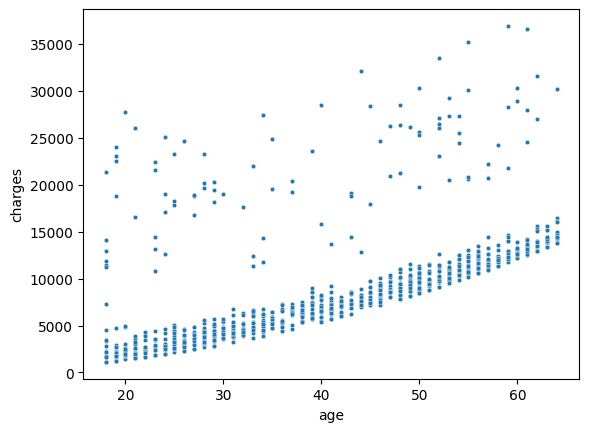

In [128]:
sns.scatterplot(data=non_smoker_df, x='age',y='charges',s=10)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:
**y=wx+b**

The line is characterized two numbers:
 (called "slope") and
 (called "intercept").

**Model**
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

**charges=w x age +b**
We'll try determine
  w and b
 for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers
  w and b
 are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute
, given
,
 and
.

In [129]:

def estimate_charges(age, w, b):
  return w * age + b

The estimate_charges function is our very first model.

Let's guess the values for
 w and b
 and use them to estimate the value for charges.

In [130]:
 w=50
 b=100

In [131]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)


estimated_charges = estimate_charges(ages, w, b)
We can plot the estimated charges using a line graph.

plt.plot(ages,estimated_charges, 'r-o')

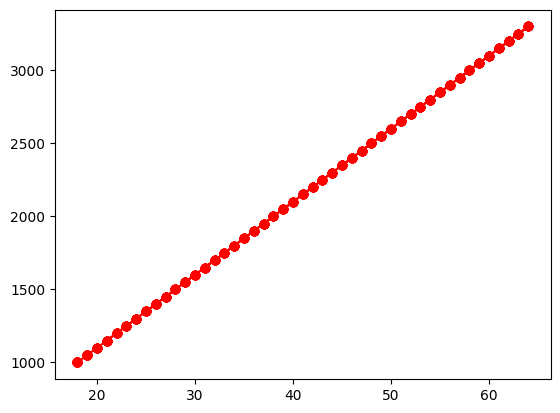

In [132]:
plt.plot(ages,estimated_charges, 'r-o')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

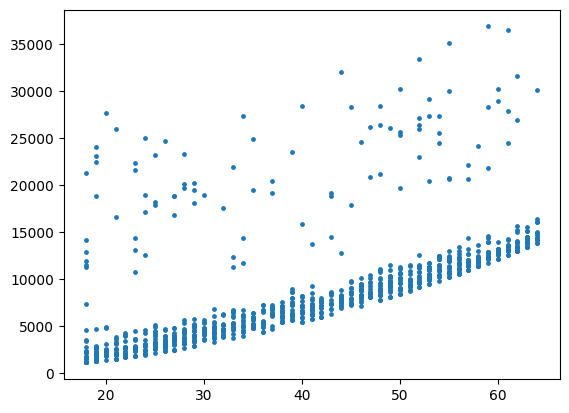

In [133]:
target = non_smoker_df.charges
plt.scatter(ages,target,s=6)

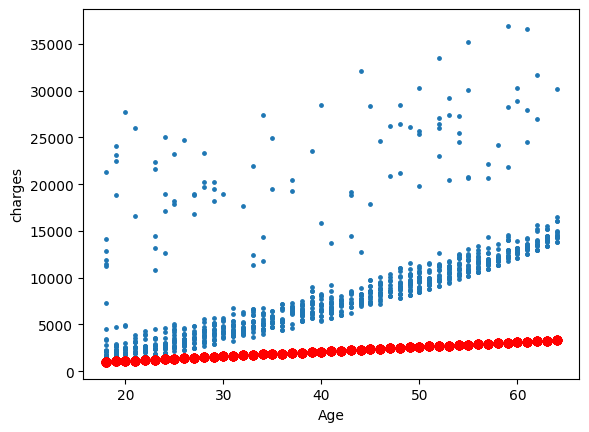

In [134]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
plt.scatter(ages,target,s=6)
plt.xlabel('Age');
plt.ylabel("charges");

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of
 and
 to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot

In [135]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(ages,target,s=6)
  plt.xlabel('Age');
  plt.ylabel("charges");

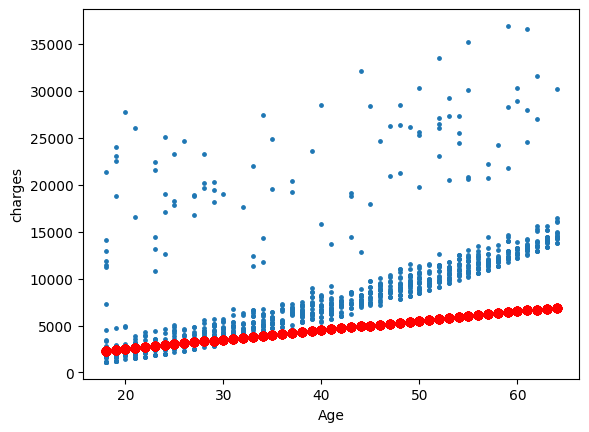

In [136]:

try_parameters(100, 500)

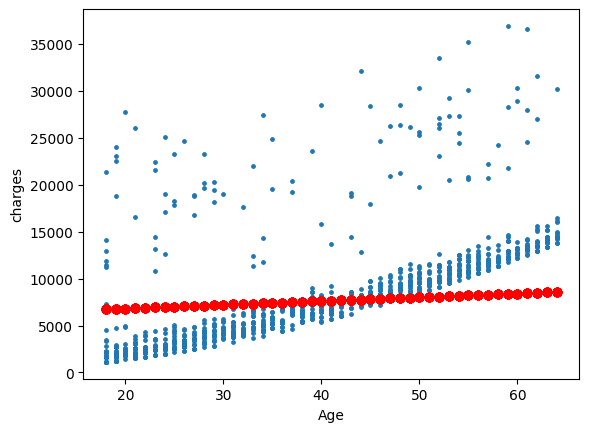

In [137]:
try_parameters(40, 6000)

**Loss/Cost Function**
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

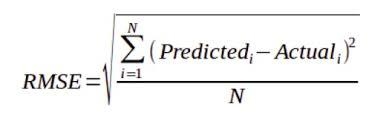
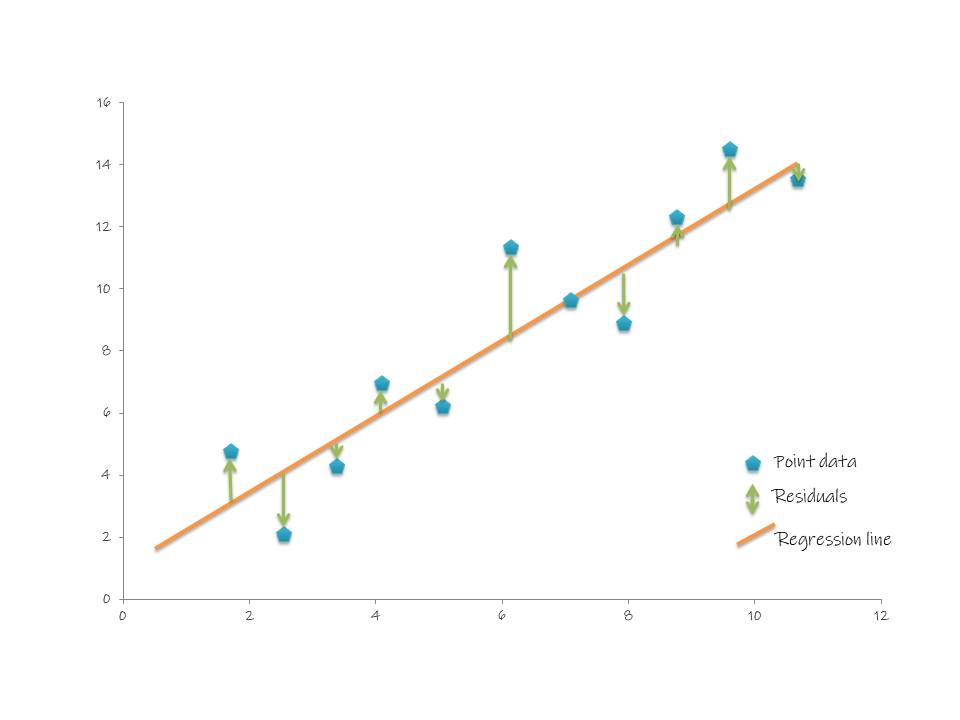

In [138]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [139]:
w=50
b=100

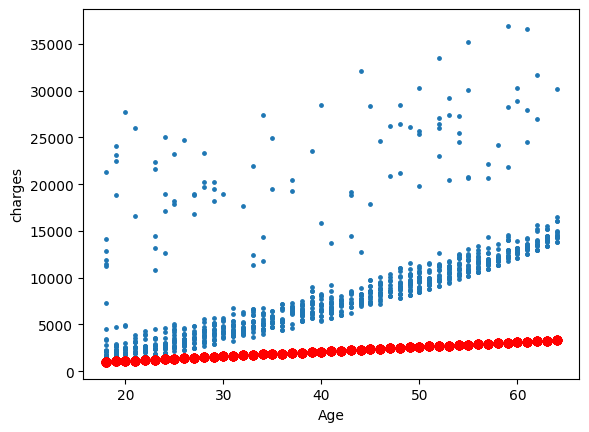

In [140]:
try_parameters(w, b)


Let's compute the RMSE for our model with a sample set of weights

In [141]:

targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [142]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [143]:
medical_info.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by $8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss.

In [144]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 4971.5967339993995


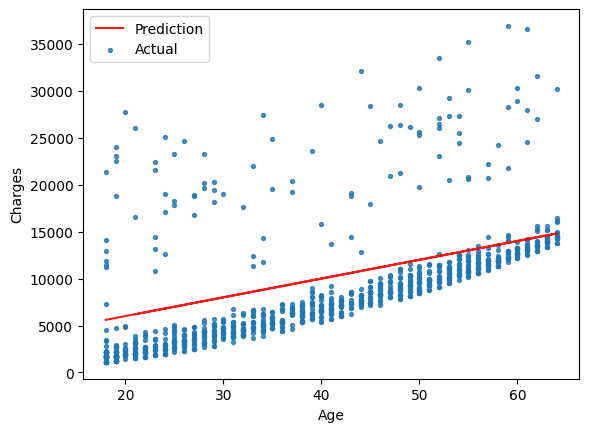

In [145]:
try_parameters(200, 2000)

EXERCISE: Try different values of
 and
 to minimize the RMSE loss. What's the lowest value of loss you are able to achieve? Can you come with a general strategy for finding better values of
 and
 by trial and error?

RMSE LOSS: 4662.516524487403


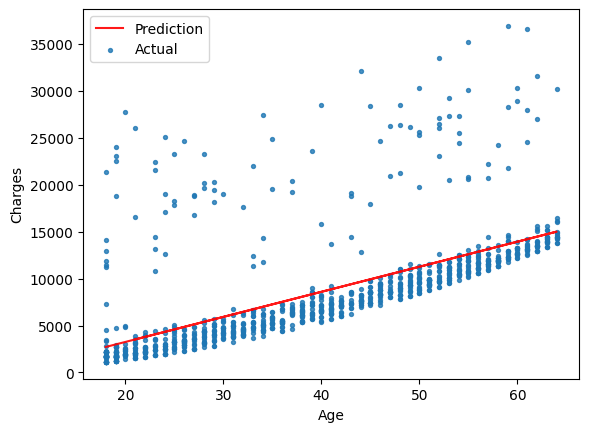

In [161]:

try_parameters(267, -2091)

**Linear Regression using Scikit-learn**
In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

In [147]:
from sklearn.linear_model import LinearRegression

Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

First, we create a new model objec

In [148]:
model = LinearRegression()
model

LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

Not that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [149]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Inputs.Shape:',inputs.shape)
print('Targets.Shape:',targets.shape)

Inputs.Shape: (1064, 1)
Targets.Shape: (1064,)


In [150]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [151]:
model.predict(np.array([[23],
                       [50],
                       [60]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855, 11271.02508499, 13943.51421331])

In [152]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [153]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties.

In [154]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [155]:
model.intercept_

np.float64(-2091.4205565650864)

In [156]:
model.coef_

array([267.24891283])

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE LOSS: 4662.505766636395


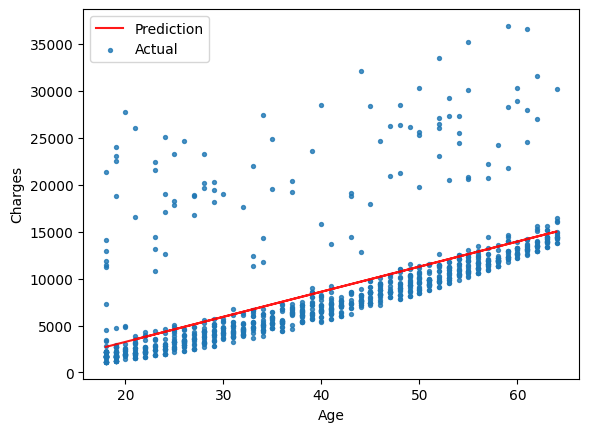

In [157]:

try_parameters(model.coef_, model.intercept_)

Machine Learning
Congratulations, you've just trained your first machine learning model! Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

Model

Cost Function

Optimizer
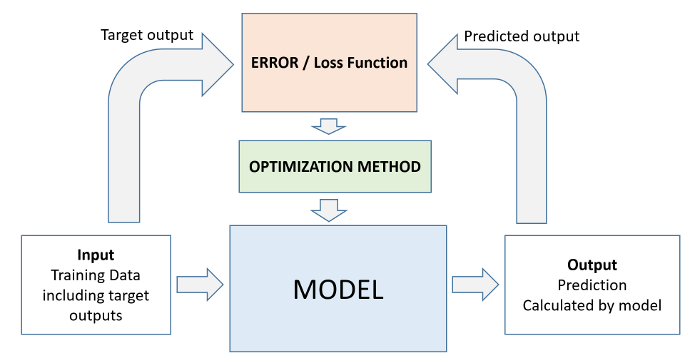

In [162]:
# create inputs and targets
inputs, targets = non_smoker_df[['age'], non_smoker_df['charges']]

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

InvalidIndexError: (['age'], 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64)

**Linear Regression using Multiple Features**
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:


We need to change just one line of code to include the BMI.

In [163]:
# create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4608.470405038247


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [165]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [166]:


px.scatter(non_smoker_df, x='bmi',y='charges')

In [167]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]),
 np.float64(-2809.2976032235892))

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".



In [168]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [169]:
px.strip(non_smoker_df, x="children", y ='charges')

In [170]:
# create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4608.470405038247


EXERCISE: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [171]:
inputs, targets = medical_info[['age','bmi','children']], medical_info['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [172]:
medical_info

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [173]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


**Using Categorical Features for Machine Learning**
So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals
**Binary Categories**
The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

<Axes: xlabel='smoker', ylabel='charges'>

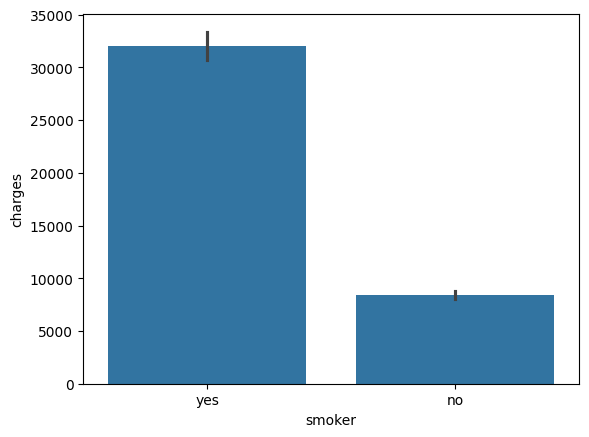

In [174]:
sns.barplot(data=medical_info, x='smoker',y ='charges')

In [175]:
smoker_codes = {'no':0, 'yes': 1}#decoding
medical_info['smoker_code'] = medical_info.smoker.map(smoker_codes)

In [176]:
medical_info

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [177]:
medical_info.charges.corr(medical_info.smoker_code)

np.float64(0.787251430498478)

In [178]:
# create inputs and targets
inputs, targets = medical_info[['age','bmi','children','smoker_code']], medical_info['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.439217188081


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

Let's try adding the "sex" column as well.

<Axes: xlabel='sex', ylabel='charges'>

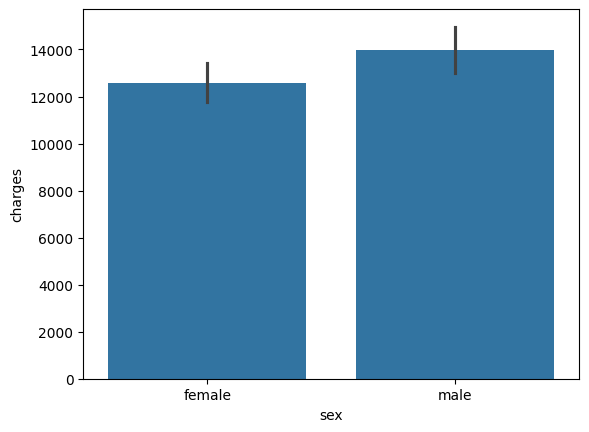

In [179]:
sns.barplot(data= medical_info, x = 'sex',y ='charges')

In [180]:
sex_code = {'female': 0 , 'male': 1 }
medical_info['sex_code'] = medical_info.sex.map(sex_code)
medical_info.charges.corr(medical_info.sex_code)

np.float64(0.057292062202025484)

In [181]:
# create inputs and targets
inputs, targets = medical_info[['age','bmi','children','sex_code','smoker_code']], medical_info['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.100708754546


As you might expect, this does have a significant impact on the loss.

One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.
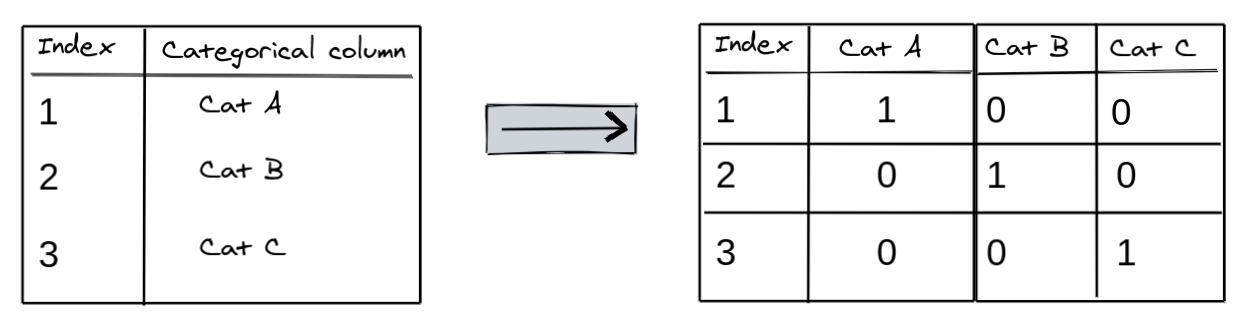

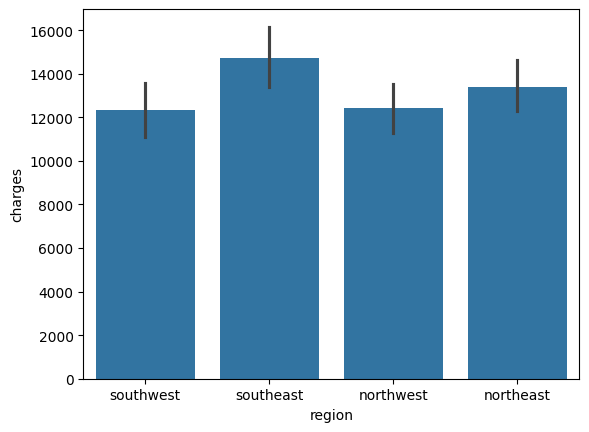

In [182]:
sns.barplot(data = medical_info, x = 'region', y = 'charges');

In [183]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(medical_info[['region']])
encode.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [184]:
one_hot = encode.transform(medical_info[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [185]:
medical_info[['northeast','northwest','southeast','southwest']] = one_hot
medical_info

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.



In [186]:
# create inputs and targets
inputs, targets = medical_info[['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']], medical_info['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6041.6796511744515


In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
inputs, targets = medical_info[['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']], medical_info['charges']

# create and train model
model_rf = RandomForestRegressor().fit(inputs, targets)

# Generate predictions
predictions = model_rf.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  1851.1649216943479


In [189]:
model_rf.predict([[19,24,0,0,0,0,0,0,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([1739.264839])